In [1]:
cd ../..

/home/jovyan/Robbi/dea-intertidal


In [ ]:
# !pip install dea_tools==0.3.1
# from dea_tools.datahandling import load_reproject

In [ ]:
# from datacube import Datacube
# import odc.geo.xr

# dc = Datacube()
# ds = dc.load(
#     product='nidem',
#     latitude=(-18.143467, -18.229763),
#     longitude=(122.152615, 122.248636),
# ).squeeze().rename({"nidem": "elevation"})

# from datacube.utils.masking import mask_invalid_data
# ds = mask_invalid_data(ds)

In [ ]:
# import xarray as xr
# import glob
# import rioxarray
# import rasterio

# outputs = glob.glob("data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2023--P1Y/*.tif")
# outputs = glob.glob("data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2021--P1Y/*.tif")
# ds = xr.merge([rioxarray.open_rasterio(filename=i, masked=True).to_dataset(name=i.split("/")[-1].split("_")[-1].replace(".tif", "").replace("-", "_")) for i in outputs])
# ds = ds.rename(band="time")

In [ ]:
# from pystac import Item
# from odc.stac import load
# import odc.geo.xr

# item_urls = [
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2022--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2022--P1Y_final.stac-item.json",
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2021--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2021--P1Y_final.stac-item.json",
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2020--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2020--P1Y_final.stac-item.json",
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2019--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2019--P1Y_final.stac-item.json",
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2018--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2018--P1Y_final.stac-item.json",
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2017--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2017--P1Y_final.stac-item.json",    
#     "https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/v0-0-1/x094/y145/2016--P1Y/ga_s2ls_intertidal_cyear_3_x094y145_2016--P1Y_final.stac-item.json",    
# ]

# t, l = -20.28, 118.58
# b, r = -20.31, 118.61


# items = [Item.from_file(u) for u in item_urls]
# ds = load(items, lon=(l, r), lat=(t, b))

In [ ]:
# ds.elevation.diff("time", 1).plot.imshow(col="time", vmin=-0.3, vmax=0.3, cmap="RdBu", col_wrap=3, size=10)

In [ ]:
from dea_tools.plotting import xr_animation

In [ ]:
xr_animation(ds, bands="elevation", output_path="spoilbank.gif", show_date='%Y', interval=200, imshow_kwargs=dict(cmap="viridis"), show_colorbar=False)

In [2]:
from odc.ui import select_on_a_map

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [3]:
import datacube
import odc.geo.xr

config = {
    'db_hostname': 'dea-dev-eks-proxy-share.endpoint.proxy-cxhoeczwhtar.ap-southeast-2.rds.amazonaws.com',
    'db_database': 'odc',
    'db_username': 'sandbox_reader',
    'db_password': 'ZWGRrBLmRs9WqTIj'
}
dc = datacube.Datacube(config=config)

# query_params = dict(y=( -20.28, -20.31),
#                     x=(118.58, 118.61),
#                     time=("2015", "2022"))

geom = select_on_a_map()
query_params = dict(geopolygon=geom,
                    time="2021")

load_params = dict(
    resolution=(-30, 30),
    # dask_chunks={},
    # measurements=["exposure"],
                  )

ds = dc.load(product="ga_s2ls_intertidal_cyear_3",
             **query_params,
             **load_params)

from datacube.utils.masking import mask_invalid_data
ds = mask_invalid_data(ds)
ds

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

<xarray.Dataset>
Dimensions:                (time: 1, y: 657, x: 725)
Coordinates:
  * time                   (time) datetime64[ns] 2021-07-02T11:59:59.999999
  * y                      (y) float64 -3.864e+06 -3.864e+06 ... -3.884e+06
  * x                      (x) float64 1.712e+06 1.712e+06 ... 1.734e+06
    spatial_ref            int32 3577
Data variables: (12/13)
    elevation              (time, y, x) float32 nan nan nan nan ... nan nan nan
    elevation_uncertainty  (time, y, x) float32 nan nan nan nan ... nan nan nan
    exposure               (time, y, x) float32 nan nan nan nan ... nan nan nan
    extents                (time, y, x) float32 nan nan nan nan ... 3.0 3.0 3.0
    ta_hat                 (time, y, x) float32 nan nan nan ... 1.04 1.04 1.04
    ta_hot                 (time, y, x) float32 nan nan nan ... 0.9921 0.9921
    ...                     ...
    ta_lat                 (time, y, x) float32 nan nan nan ... -0.8614 -0.8614
    ta_offset_high         (time, y, x) float32 nan nan nan nan ... 2.0 2.0 2.0
    ta_offset_low          (time, y, x) float32 nan nan nan ... 14.0 14.0 14.0
    ta_spread              (time, y, x) float32 nan nan nan ... 83.0 83.0 83.0
    qa_ndwi_corr           (time, y, x) float32 nan nan nan nan ... nan nan nan
    qa_ndwi_freq           (time, y, x) float32 nan nan nan nan ... nan nan nan
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [ ]:
# # Reusable Chunks 3. Legends
# legend_idx_0_1_5ticks = {"begin": "0.0", "end": "1.0", "ticks_every": "0.2"}

# legend_idx_percentage_by_10 = {
#     "begin": "0.0",
#     "end": "1.0",
#     "ticks_every": 0.1,
#     "units": "%",
#     "tick_labels": {
#         "0.0": {"label": "0"},
#         "0.1": {"label": "10"},
#         "0.2": {"label": "20"},
#         "0.3": {"label": "30"},
#         "0.4": {"label": "40"},
#         "0.5": {"label": "50"},
#         "0.6": {"label": "60"},
#         "0.7": {"label": "70"},
#         "0.8": {"label": "80"},
#         "0.9": {"label": "90"},
#         "1.0": {"label": "100"},
#     },
# }

# legend_idx_percentage_by_20 = {
#     "begin": "0.0",
#     "end": "1.0",
#     "decimal_places": 1,
#     "ticks_every": "0.2",
#     "units": "%",
#     "tick_labels": {
#         "0.0": {"label": "0"},
#         "0.2": {"label": "20"},
#         "0.4": {"label": "40"},
#         "0.6": {"label": "60"},
#         "0.8": {"label": "80"},
#         "1.0": {"label": "100"},
#     },
# }

# legend_idx_percentage_by_25 = {
#     "units": "%",
#     "decimal_places": 2,
#     "begin": "0.00",
#     "end": "1.00",
#     "ticks_every": 0.25,
#     "tick_labels": {
#         "0.00": {"label": "0"},
#         "0.25": {"label": "25"},
#         "0.50": {"label": "50"},
#         "0.75": {"label": "75"},
#         "1.00": {"label": "100"},
#     },
# }

# legend_idx_twentyplus_3ticks = {
#     "begin": 0,
#     "end": 20,
#     "decimal_places": 0,
#     "ticks_every": 10,
#     "tick_labels": {"20": {"prefix": ">"}},
# }

# legend_idx_thirtyplus_4ticks = {
#     "begin": 0,
#     "end": 30,
#     "decimal_places": 0,
#     "ticks_every": 10,
#     "tick_labels": {"30": {"prefix": ">"}},
#     "strip_location": [0.05, 0.5, 0.89, 0.15],
# }

# legend_idx_0_100_as_0_1_5ticks = {
#     "begin": 0,
#     "end": 100,
#     "units": "unitless",
#     "ticks_every": 20,
#     "tick_labels": {
#         "0": {"label": "0.0"},
#         "20": {"label": "0.2"},
#         "40": {"label": "0.4"},
#         "60": {"label": "0.6"},
#         "80": {"label": "0.8"},
#         "100": {"label": "1.0"},
#     },
# }

# legend_idx_0_100_pixel_fc_25ticks = {
#     "begin": 0,
#     "end": 100,
#     "units": "% / pixel",
#     "ticks_every": 25,
#     "title": "Percentage of Pixel that is Green Vegetation",
#     "rcParams": {"font.size": 9},
# }

# legend_idx_0_100_pixel_fc_ngv_25ticks = {
#     "begin": 0,
#     "end": 100,
#     "units": "% / pixel",
#     "ticks_every": 25,
#     "title": "Percentage of Pixel that is Non-green Vegetation",
#     "rcParams": {"font.size": 9},
# }

# legend_idx_0_100_pixel_fc_bs_25ticks = {
#     "begin": 0,
#     "end": 100,
#     "ticks_every": 25,
#     "units": "% / pixel",
#     "title": "Percentage of Pixel that is Bare Soil",
#     "rcParams": {"font.size": 9},
# }


In [7]:
from datacube_ows.band_utils import scalable


@scalable
def elevation_adaptive(data, band, lot, hot, band_mapper=None):
    
    # Calculate observed tide range (max - min)
    otr = data[hot] - data[lot]

    # Calculate the distance between min and third_array value
    distance_to_min = data[band] - data[lot]

    # Calculate proportion
    proportion_array = distance_to_min / otr

    return proportion_array


@scalable
def uncertainty_adaptive(data, band, lot, hot, band_mapper=None):
    
    # Calculate observed tide range (max - min)
    otr = data[hot] - data[lot]

    # Calculate proportion
    proportion_array = data[band] / otr

    return proportion_array


legend_intertidal_percentage_by_20 = {
    "begin": "0.0",
    "end": "100",
    "decimal_places": 1,
    "ticks_every": "20",
    "units": "%",
    "tick_labels": {
        "0": {"label": "0"},
        "20": {"label": "20"},
        "40": {"label": "40"},
        "60": {"label": "60"},
        "80": {"label": "80"},
        "100": {"label": "100"},
    },
}

style_intertidal_elevation = {
    "name": "intertidal_elevation",
    "title": "Elevation",
    "abstract": "Intertidal elevation in metres above Mean Sea Level",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation"],
    "mpl_ramp": "viridis",
    "range": [-2.0, 1.0],
    "legend": {
        "begin": "-2.0",
        "end": "1.0",
        "ticks": ["-2.0", "-1.0", "0.0", "1.0"],
        "units": "metres above Mean Sea Level",
        "tick_labels": {
            "1.0": {"prefix": ">"},
            "-2.0": {"prefix": "<"},
        },
    },
}

style_intertidal_elevation_macro = {
    "name": "intertidal_elevation_macro",
    "title": "Elevation (macrotidal style)",
    "abstract": "Intertidal elevation in metres above Mean Sea Level",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation"],
    "mpl_ramp": "viridis",
    "range": [-4.0, 2.0],
    "legend": {
        "begin": "-4.0",
        "end": "2.0",
        "ticks": ["-4.0", "-2.0", "0.0", "2.0"],
        "units": "metres above Mean Sea Level",
        "tick_labels": {
            "2.0": {"prefix": ">"},
            "-4.0": {"prefix": "<"},
        },
    },
}


style_intertidal_elevation_uncertainty = {
    "name": "intertidal_elevation_uncertainty",
    "title": "Elevation uncertainty",
    "abstract": "Intertidal elevation uncertainty in metres",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation_uncertainty",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation_uncertainty"],
    "mpl_ramp": "inferno",
    "range": [0.1, 1.0],
    "legend": {
        "begin": "0.0",
        "end": "1.0",
        "ticks": ["0.0", "0.5", "1.0"],
        "units": "metres",
        "tick_labels": {
            "1.0": {"prefix": ">"},
        },
    },
}


style_intertidal_exposure = {
    "name": "intertidal_exposure",
    "title": "Exposure",
    "abstract": "Intertidal exposure in percent of time exposed to air",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "exposure",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["exposure"],
    "color_ramp": [
        {"value": 0, "color": '#2f0f3d'},
        {'value': 10, 'color': '#4f1552'},
        {'value': 20, 'color': '#72195f'},
        {'value': 30, 'color': '#931f63'},        
        {'value': 40, 'color': '#b32e5e'},
        {'value': 50, 'color': '#ce4356'},
        {'value': 60, 'color': '#e26152'},         
        {'value': 70, 'color': '#ee845d'},
        {'value': 80, 'color': '#f5a672'},
        {'value': 90, 'color': '#faca8f'},
        {'value': 100, 'color': '#fdedb0'}
    ],
    "legend": legend_intertidal_percentage_by_20,
}


style_intertidal_extents = {
    "name": "intertidal_extents",
    "title": "Extents",
    "abstract": "Intertidal Extents classification",
    "needed_bands": ["extents"],
    "value_map": {
        "extents": [
            {
                "title": "Dry",
                "abstract": "",
                "values": [0],
                "color": "#dddddd",
            },
            {
                "title": "Inland intermittent wet",
                "abstract": "",
                "values": [1],
                "color": "#00a7c8",
            },
            {
                "title": "Inland persistent wet",
                "abstract": "",
                "values": [2],
                "color": "#00667a",
            },
            {
                "title": "Tidally influenced wet",
                "abstract": "",
                "values": [3],
                "color": "#2a5fa1",
            },
            {
                "title": "Intertidal (low confidence)",
                "abstract": "",
                "values": [4],
                "color": "#ffe8a1",
            },
            {
                "title": "Intertidal (high confidence)",
                "abstract": "",
                "values": [5],
                "color": "#ffc001",
            },
        ]
    }
}


style_intertidal_elevation_adaptive = {
    "name": "intertidal_elevation_adaptive",
    "title": "Elevation (experimental adaptive style)",
    "abstract": "Intertidal elevation in metres above Mean Sea Level",
    "index_function": {
        "function": elevation_adaptive,  # "ows_refactored.sea_ocean_coast.intertidal_c3.utils_intertidal.elevation_adaptive",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation",
            "lot": "ta_lot",
            "hot": "ta_hot",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation", "ta_lot", "ta_hot"],
    "mpl_ramp": "viridis",
    "range": [0.1, 0.7],
    "legend": {
        "begin": "0.1",
        "end": "0.7",
        "ticks": ["0.1", "0.7"],
        "units": "",
        "tick_labels": {
            "0.1": {"label": "Low"},
            "0.7": {"label": "High"},
        },
    },
}


style_intertidal_elevation_uncertainty_adaptive = {
    "name": "intertidal_elevation_uncertainty_adaptive",
    "title": "Elevation uncertainty (experimental)",
    "abstract": "Intertidal elevation uncertainty",
    "index_function": {
        "function": uncertainty_adaptive,  # "ows_refactored.sea_ocean_coast.intertidal_c3.utils_intertidal.elevation_adaptive",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation_uncertainty",
            "lot": "ta_lot",
            "hot": "ta_hot",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation_uncertainty", "ta_lot", "ta_hot"],
    "mpl_ramp": "inferno",
    "range": [0.1, 0.3],
    "legend": {
        "begin": "0.1",
        "end": "0.3",
        "ticks": ["0.1", "0.3"],
        "units": "",
        "tick_labels": {
            "0.1": {"label": "Low"},
            "0.3": {"label": "High"},
        },
    },
}


style_intertidal_corr = {
    "name": "intertidal_corr",
    "title": "NDWI tide correlation",
    "abstract": "Correlation between NDWI and tide height",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "qa_ndwi_corr",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["qa_ndwi_corr"],
    "mpl_ramp": "RdBu",
    "range": [-0.5, 0.5],
    "legend": {
        "begin": "-0.5",
        "end": "0.5",
        "ticks": ["-0.5", "0.0", "0.5"],
        "units": "correlation",
    },
}

style_intertidal_freq = {
    "name": "intertidal_freq",
    "title": "NDWI frequency",
    "abstract": "NDWI inundation frequency",
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "qa_ndwi_freq",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["qa_ndwi_freq"],
    "mpl_ramp": "RdBu",
    "range": [0, 100],
    "legend": legend_intertidal_percentage_by_20,
}


# Create combined list that is imported and passed to the layer
styles_intertidal_list = [
    style_intertidal_elevation,
    style_intertidal_elevation_macro,
    style_intertidal_elevation_adaptive,
    style_intertidal_elevation_uncertainty,
    style_intertidal_exposure,
    style_intertidal_extents,
]

/env/lib/python3.10/site-packages/datacube_ows/styles/ramp.py:258: RuntimeWarning: invalid value encountered in cast
  return val.astype("uint8")


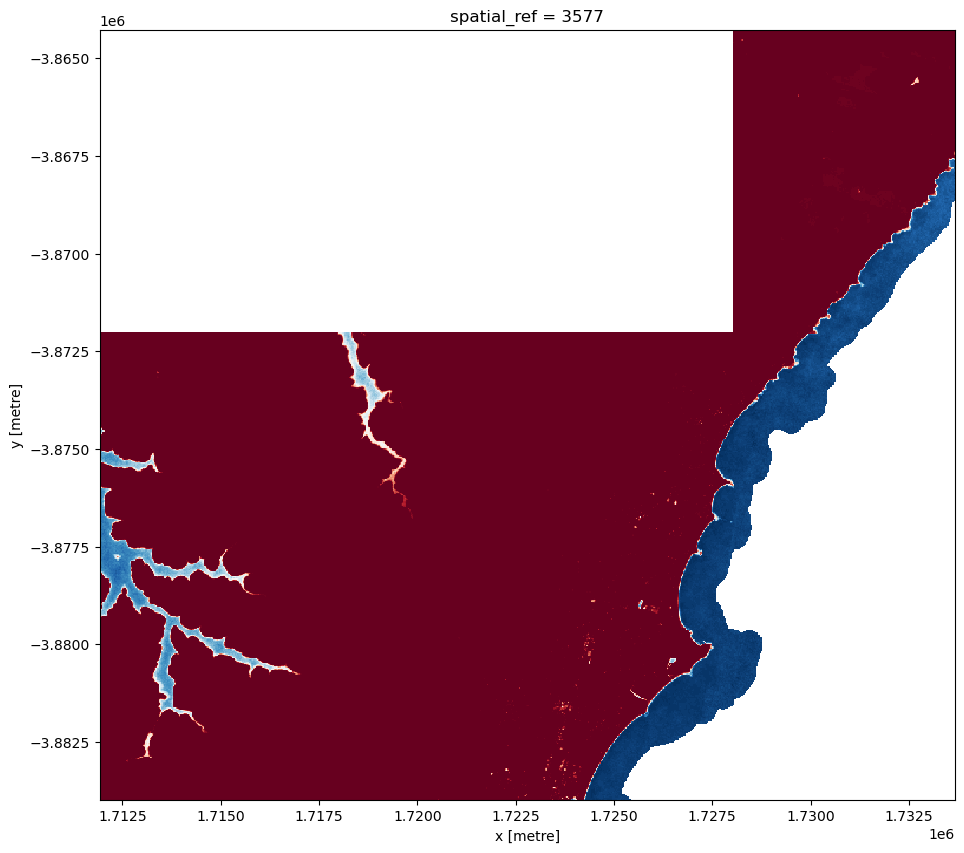

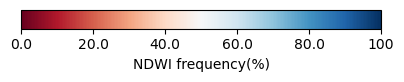

In [8]:
from datacube_ows.styles.api import StandaloneStyle, apply_ows_style_cfg, xarray_image_as_png, plot_image_with_style_cfg
from datacube_ows.styles.api import generate_ows_legend_style_cfg

# Assumes the spatial dimensions are called "x" and "y".
config = style_intertidal_freq
plot_image_with_style_cfg(config, ds)
image = generate_ows_legend_style_cfg(config)

In [23]:
# @scalable
def elevation_adaptive_hillshade(data, band, band_mapper=None):
    
    
#     from matplotlib.colors import LightSource, Normalize
#     import matplotlib.pyplot as plt
    
#     azdeg=315
#     altdeg=45
#     dyx=10
#     vert_exag=100
    
#     # Create hillshade based on elevation data
#     ls = LightSource(azdeg=azdeg, altdeg=altdeg)
#     hillshade = ls.shade(
#         data[band],
#         cmap=plt.cm.viridis,
#         blend_mode=lambda x, y: x * y,
#         vert_exag=vert_exag,
#         dx=dyx,
#         dy=dyx,
#         # **shade_kwargs,
#     )

    import numpy as np
    import xarray as xr

    def hillshade(array,azimuth,angle_altitude):
        azimuth = 360.0 - azimuth 

        x, y = np.gradient(array * 10)
        slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
        aspect = np.arctan2(-x, y)
        azimuthrad = azimuth*np.pi/180.
        altituderad = angle_altitude*np.pi/180.

        shaded = np.sin(altituderad)*np.sin(slope) + np.cos(altituderad)*np.cos(slope)*np.cos((azimuthrad - np.pi/2.) - aspect)

        return 255*(shaded + 1)/2
    
    
    return xr.apply_ufunc(hillshade, data[band].squeeze("time"), 225, 25)





style_intertidal_elevation_adaptive_hillshade = {
    "name": "intertidal_elevation_adaptive",
    "title": "Elevation",
    "abstract": "Intertidal elevation in metres above Mean Sea Level",
    "index_function": {
        "function": elevation_adaptive_hillshade,
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation",
            # "lot": "ta_lot",
            # "hot": "ta_hot",
        },
    },
    "include_in_feature_info": False,
    "needed_bands": ["elevation"],
    # "color_ramp": [
    #     {"value": 0, "color": 'white', "alpha": 0.0},
    #     {"value": 100, "color": '#808080', "alpha": 0.5},
    #     {'value': 255, 'color': 'black'}
    # ],
    "color_ramp": [
        {"value": 0, "color": "black", "alpha": 1.0},
        {"value": 50, "color": "black", "alpha": 1.0},
        {"value": 60, "color": "black", "alpha": 1.0},
        {"value": 70, "color": "black", "alpha": 1.0},
        {"value": 80, "color": "black", "alpha": 1.0},
        {"value": 90, "color": "black", "alpha": 1.0},
        {"value": 100, "color": "black", "alpha": 1.0},
        {"value": 150, "color": "black", "alpha": 0.7},
        {"value": 200, "color": "black", "alpha": 0.5},
        {"value": 210, "color": "black", "alpha": 0.3},
        {"value": 220, "color": "black", "alpha": 0.2},
        {"value": 230, "color": "black", "alpha": 0.1},
        {"value": 255, "color": "black", "alpha": 0.0},
    ],
    # "legend": legend_intertidal_percentage_by_20,
    # "mpl_ramp": "Greys",
    "range": [0, 255],
    "legend": {
        "begin": "0.0",
        "end": "255",
    #     "ticks": ["0.0", "0.5", "1.0"],
    #     "units": "",
    #     "tick_labels": {
    #         "0.0": {"label": "Low"},
    #         "0.5": {"label": ""},
    #         "1.0": {"label": "High"},
    #     },
    },
}

In [ ]:
elevation_adaptive_hillshade(ds, "elevation").plot(cmap="Grey)

### Get hex code colours from colormap

In [ ]:
import matplotlib.cm as cm
import numpy as np
import cmocean

# Choose the colormap you want
colormap = cmocean.cm.matter

# Generate 10 evenly spaced numbers between 0 and 1
values = np.linspace(0, 1, 11)

# Map the values to colors in the colormap
colors = [colormap(value) for value in values]

# Convert RGBA colors to hex
hex_colors = [
    f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" for r, g, b, _ in colors
]

print(list(reversed(hex_colors)))

In [ ]:


data.elevation.plot()

In [ ]:
data.ta_spread.compute()

In [ ]:
items[0]

In [201]:
import datacube
import odc.geo.xr

dc = datacube.Datacube()

t, l = -8.159273, 111.667984
b, r = -45.401920, 158.913895

query_params = dict(x=(l, r), 
                    y=(t, b), 
                    time="2020")

query_params = dict(x=(135.338414, 142.841515), 
                    y=(-10.273935, -18.746337), 
                    time="2020")

load_params = dict(dask_chunks={},
                  resolution=(-3000, 3000))

ds = dc.load(product="ga_ls8c_nbart_gm_cyear_3", 
             **query_params, 
             **load_params)

In [6]:
# ds.red.plot()

In [154]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree as KDTree

corr_gdf = gpd.read_file("data/raw/tide_correlations_2017-2019.geojson").to_crs(ds.odc.crs).query("valid_perc > 0.02")

In [188]:
crs=None
columns = ['FES2014', 'TPXO9-atlas-v5', 'EOT20', 'HAMTIDE11', 'GOT4.10', 'FES2012', 'TPXO8-atlas-v1']
gdf = corr_gdf
factor = 2
method = "idw"
k = 3

# Add GeoBox and odc.* accessor to array using `odc-geo`, and identify
# spatial dimension names from `ds`
ds = add_geobox(ds, crs)
y_dim, x_dim = ds.odc.spatial_dims

# Reproject to match input `ds`, and raise error if there are no overlaps
gdf = gdf.to_crs(ds.odc.crs)
if not gdf.dissolve().intersects(ds.odc.geobox.extent.geom).item():
    raise ValueError(
        "The supplied `gdf` does not overlap spatially with `ds`."
    )    

# Select subset of numeric columns (non-numeric are not supported)
numeric_gdf = gdf.select_dtypes("number")

# Subset further to supplied `columns`
try:
    numeric_gdf = numeric_gdf if columns is None else numeric_gdf[columns]
except KeyError:
    raise ValueError(
        "One or more of the provided columns either does "
        "not exist in `gdf`, or is a non-numeric column. "
        "Only numeric columns are supported by `xr_interpolate`."
    )
    
# Raise a warning if no numeric columns exist after selection
if len(numeric_gdf.columns) == 0:
    raise ValueError(
        "The provided `gdf` contains no numeric columns to interpolate."
    )
    
# Identify spatial coordinates
x_coords = gdf.geometry.x
y_coords = gdf.geometry.y

# Stack x and y point coords to use in interpolation methods
points_xy = np.vstack([x_coords, y_coords]).T

# Identify x and y coordinates from `ds` to interpolate into.
# If `factor` is greater than 1, the coordinates will be subsampled
# for faster run-times. If the last x or y value in the subsampled
# grid aren't the same as the last x or y values in the original
# full resolution grid, add the final full resolution grid value to
# ensure data is interpolated up to the very edge of the array
if ds[x_dim][::factor][-1].item() == ds[x_dim][-1].item():
    x_grid_coords = ds[x_dim][::factor].values
else:
    x_grid_coords = ds[x_dim][::factor].values.tolist() + [ds[x_dim][-1].item()]

if ds[y_dim][::factor][-1].item() == ds[y_dim][-1].item():
    y_grid_coords = ds[y_dim][::factor].values
else:
    y_grid_coords = ds[y_dim][::factor].values.tolist() + [ds[y_dim][-1].item()]

# Create grid to interpolate into
grid_y, grid_x = np.meshgrid(x_grid_coords, y_grid_coords)

# Output dict
correlation_outputs = {}
# correlation_outputs = []

# For each numeric column, run interpolation
for col, z_values in numeric_gdf.items():

    # Apply scipy.interpolate.griddata interpolation methods
    if method in ("linear", "nearest", "cubic"):
        # Interpolate x, y and z values
        interp_2d = scipy.interpolate.griddata(
            points=points_xy,
            values=z_values,
            xi=(grid_y, grid_x),
            method=method,
            **kwargs,
        )

    # Apply Radial Basis Function interpolation
    elif method == "rbf":
        # Interpolate x, y and z values
        rbf = scipy.interpolate.Rbf(x_coords, y_coords, z_values, **kwargs)
        interp_2d = rbf(grid_y, grid_x)

    # Apply Inverse Distance Weighted interpolation
    # Code inspired by: https://github.com/DahnJ/REM-xarray
    elif method == "idw":
        # Verify k is smaller than total number of points
        if k > len(z_values):
            raise ValueError(
                f"The requested number of nearest neighbours (`k={k}`) "
                f"is smaller than the total number of points ({len(z_values)})."
            )

        # Create KDTree to efficiently find nearest neighbours
        tree = KDTree(points_xy)

        # IWD interpolation
        grid_stacked = np.column_stack((grid_y.flatten(), grid_x.flatten()))
        distances, indices = tree.query(grid_stacked, k=k)

        # Calculate weights based on distance to k nearest neighbours.
        # If k == 1, then return the nearest value unweighted.
        if k > 1:
            weights = 1 / distances
            weights = weights / weights.sum(axis=1).reshape(-1, 1)
            interp_1d = (weights * z_values.values[indices]).sum(axis=1)
        else:
            interp_1d = z_values.values[indices]

    # Reshape to 2D and add to output dict
    interp_2d = interp_1d.reshape(len(y_grid_coords), len(x_grid_coords))
    correlation_outputs[col] = ((y_dim, x_dim), interp_2d) 

# Combine all outputs into a single xr.Dataset    
interpolated_ds = xr.Dataset(correlation_outputs, coords={y_dim: y_grid_coords, x_dim: x_grid_coords})

# If factor is greater than 1, resample the interpolated array to
# match the input `ds` array
if factor > 1:
    interpolated_ds = interpolated_ds.interp_like(ds)

# Ensure CRS is correctly set on output
interpolated_ds = interpolated_ds.odc.assign_crs(crs=ds.odc.crs)

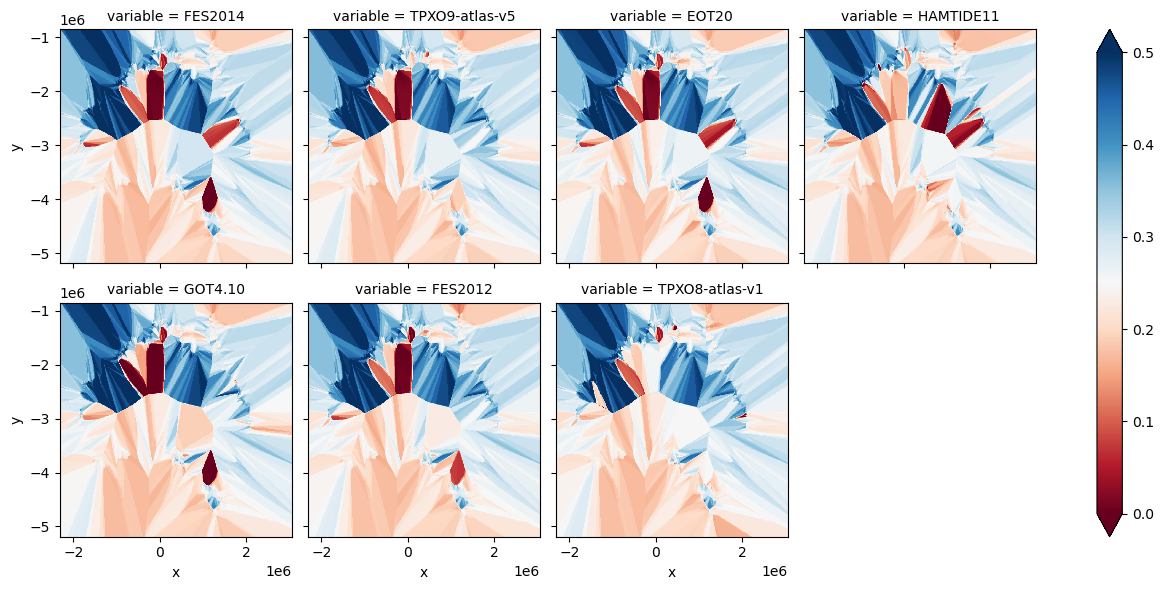

In [191]:
interpolated_ds.to_array().plot(col="variable", vmin=0, vmax=0.5, cmap="RdBu", col_wrap=4)

In [195]:
import scipy.interpolate
from dea_tools.spatial import add_geobox


from scipy.spatial import cKDTree as KDTree


def xr_interpolate(
    ds,
    gdf,
    columns=None,
    method="linear",
    factor=1,
    k=10,
    crs=None,
    **kwargs,
):
    """
    This function takes a geopandas.GeoDataFrame points dataset
    containing one or more numeric columns, and interpolates these points
    into the spatial extent of an existing xarray dataset. This can be
    useful for producing smooth raster surfaces from point data to
    compare directly against satellite data.

    Supported interpolation methods include "linear", "nearest" and
    "cubic" (using `scipy.interpolate.griddata`), "rbf" (using
    `scipy.interpolate.Rbf`), and "idw" (Inverse Distance Weighted
    interpolation using `k` nearest neighbours). Each numeric column
    will be returned as a variable in the output xarray.Dataset.

    Last modified: March 2024

    Parameters
    ----------
    ds : xarray.DataArray or xarray.Dataset
        A two-dimensional or multi-dimensional array whose spatial extent
        will be used to interpolate point data into.
    gdf : geopandas.GeoDataFrame
        A dataset of spatial points including at least one numeric column.
        By default all numeric columns in this dataset will be spatially
        interpolated into the extent of `ds`; specific columns can be
        selected using `columns`. An error will be raised if the points
        in `gdf` do not overlap with the extent of `ds`.
    columns : list, optional
        An optional list of specific columns in gdf` to run the
        interpolation on. These must all be of numeric data types.
    method : string, optional
        The method used to interpolate between point values. This string
        is either passed to `scipy.interpolate.griddata` (for "linear",
        "nearest" and "cubic" methods), or used to specify Radial Basis
        Function interpolation using `scipy.interpolate.Rbf` ("rbf"), or
        Inverse Distance Weighted interpolation ("idw").
        Defaults to 'linear'.
    factor : int, optional
        An optional integer that can be used to subsample the spatial
        interpolation extent to obtain faster interpolation times, before
        up-sampling the array back to the original dimensions of the
        data as a final step. For example, `factor=10` will interpolate
        data into a grid that has one tenth of the resolution of `ds`.
        This will be significantly faster than interpolating at full
        resolution, but will potentially produce less accurate results.
    k : int, optional
        The number of nearest neighbours used to calculate weightings if
        `method` is "idw". Defaults to 10; setting `k=1` is equivalent to
        "nearest" interpolation.
    crs : string or CRS object, optional
        If `ds`'s coordinate reference system (CRS) cannot be determined,
        provide a CRS using this parameter (e.g. 'EPSG:3577').
    **kwargs :
        Optional keyword arguments to pass to either
        `scipy.interpolate.griddata` (if `method` is "linear", "nearest"
        or "cubic"), or `scipy.interpolate.Rbf` (is `method` is "rbf").

    Returns
    -------
    interpolated_ds : xarray.Dataset
        An xarray.Dataset containing interpolated data with the same X
        and Y coordinate pixel grid as `ds`, and a data variable for
        each numeric column in `gdf`.
    """

    # Add GeoBox and odc.* accessor to array using `odc-geo`, and identify
    # spatial dimension names from `ds`
    ds = add_geobox(ds, crs)
    y_dim, x_dim = ds.odc.spatial_dims

    # Reproject to match input `ds`, and raise error if there are no overlaps
    gdf = gdf.to_crs(ds.odc.crs)
    if not gdf.dissolve().intersects(ds.odc.geobox.extent.geom).item():
        raise ValueError(
            "The supplied `gdf` does not overlap spatially with `ds`."
        )    

    # Select subset of numeric columns (non-numeric are not supported)
    numeric_gdf = gdf.select_dtypes("number")

    # Subset further to supplied `columns`
    try:
        numeric_gdf = numeric_gdf if columns is None else numeric_gdf[columns]
    except KeyError:
        raise ValueError(
            "One or more of the provided columns either does "
            "not exist in `gdf`, or is a non-numeric column. "
            "Only numeric columns are supported by `xr_interpolate`."
        )

    # Raise a warning if no numeric columns exist after selection
    if len(numeric_gdf.columns) == 0:
        raise ValueError(
            "The provided `gdf` contains no numeric columns to interpolate."
        )

    # Identify spatial coordinates
    x_coords = gdf.geometry.x
    y_coords = gdf.geometry.y

    # Stack x and y point coords to use in interpolation methods
    points_xy = np.vstack([x_coords, y_coords]).T

    # Identify x and y coordinates from `ds` to interpolate into.
    # If `factor` is greater than 1, the coordinates will be subsampled
    # for faster run-times. If the last x or y value in the subsampled
    # grid aren't the same as the last x or y values in the original
    # full resolution grid, add the final full resolution grid value to
    # ensure data is interpolated up to the very edge of the array
    if ds[x_dim][::factor][-1].item() == ds[x_dim][-1].item():
        x_grid_coords = ds[x_dim][::factor].values
    else:
        x_grid_coords = ds[x_dim][::factor].values.tolist() + [ds[x_dim][-1].item()]

    if ds[y_dim][::factor][-1].item() == ds[y_dim][-1].item():
        y_grid_coords = ds[y_dim][::factor].values
    else:
        y_grid_coords = ds[y_dim][::factor].values.tolist() + [ds[y_dim][-1].item()]

    # Create grid to interpolate into
    grid_y, grid_x = np.meshgrid(x_grid_coords, y_grid_coords)

    # Output dict
    correlation_outputs = {}
    # correlation_outputs = []

    # For each numeric column, run interpolation
    for col, z_values in numeric_gdf.items():

        # Apply scipy.interpolate.griddata interpolation methods
        if method in ("linear", "nearest", "cubic"):
            # Interpolate x, y and z values
            interp_2d = scipy.interpolate.griddata(
                points=points_xy,
                values=z_values,
                xi=(grid_y, grid_x),
                method=method,
                **kwargs,
            )

        # Apply Radial Basis Function interpolation
        elif method == "rbf":
            # Interpolate x, y and z values
            rbf = scipy.interpolate.Rbf(x_coords, y_coords, z_values, **kwargs)
            interp_2d = rbf(grid_y, grid_x)

        # Apply Inverse Distance Weighted interpolation
        # Code inspired by: https://github.com/DahnJ/REM-xarray
        elif method == "idw":
            # Verify k is smaller than total number of points
            if k > len(z_values):
                raise ValueError(
                    f"The requested number of nearest neighbours (`k={k}`) "
                    f"is smaller than the total number of points ({len(z_values)})."
                )

            # Create KDTree to efficiently find nearest neighbours
            tree = KDTree(points_xy)

            # IWD interpolation
            grid_stacked = np.column_stack((grid_y.flatten(), grid_x.flatten()))
            distances, indices = tree.query(grid_stacked, k=k)

            # Calculate weights based on distance to k nearest neighbours.
            # If k == 1, then return the nearest value unweighted.
            if k > 1:
                weights = 1 / distances
                weights = weights / weights.sum(axis=1).reshape(-1, 1)
                interp_1d = (weights * z_values.values[indices]).sum(axis=1)
            else:
                interp_1d = z_values.values[indices]

            # Reshape to 2D
            interp_2d = interp_1d.reshape(len(y_grid_coords), len(x_grid_coords))
        
        # Add 2D interpolated array to output dictionary
        correlation_outputs[col] = ((y_dim, x_dim), interp_2d) 

    # Combine all outputs into a single xr.Dataset    
    interpolated_ds = xr.Dataset(correlation_outputs, coords={y_dim: y_grid_coords, x_dim: x_grid_coords})

    # If factor is greater than 1, resample the interpolated array to
    # match the input `ds` array
    if factor > 1:
        interpolated_ds = interpolated_ds.interp_like(ds)

    # Ensure CRS is correctly set on output
    interpolated_ds = interpolated_ds.odc.assign_crs(crs=ds.odc.crs)
    
    return interpolated_ds

/tmp/ipykernel_196/2925157730.py:24: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(fig.axes.flatten()):


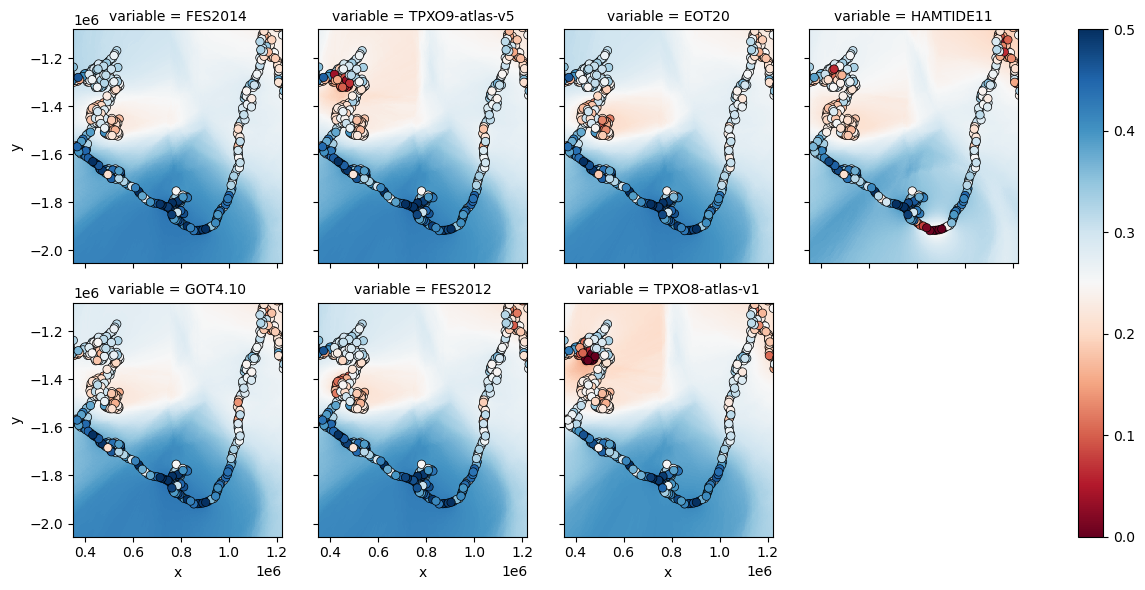

In [251]:
columns = [
    "FES2014",
    "TPXO9-atlas-v5",
    "EOT20",
    "HAMTIDE11",
    "GOT4.10",
    "FES2012",
    "TPXO8-atlas-v1",
]

interpolated_ds = xr_interpolate(
    ds,
    gdf,
    columns=columns,
    method="idw",
    k=100,
    factor=1,
)

interpolated_ds


fig = interpolated_ds.to_array().plot(col="variable", vmin=0, vmax=0.5, cmap="RdBu", col_wrap=4)
for i, ax in enumerate(fig.axes.flatten()):
    if i < 7:
        corr_gdf.to_crs(interpolated_ds.odc.crs).plot(ax=ax, column=columns[i], edgecolors='black', linewidth=0.5, cmap="RdBu", vmin=0, vmax=0.5)


In [232]:
columns

['FES2014',
 'TPXO9-atlas-v5',
 'EOT20',
 'HAMTIDE11',
 'GOT4.10',
 'FES2012',
 'TPXO8-atlas-v1']

In [230]:
i

7

In [248]:
gqa = np.array([0.1, 0.2, 0.5, 2.4, np.NaN, np.NaN])
cloudiness_perc = np.array([0.3, 0.1, 0.3, 0.6, 0.9, 1.0])

print(f"True cloud percent: {np.mean(cloudiness_perc):.2%}")
print(f"Cloud percent after GQA filtering: {np.mean(cloudiness_perc[gqa < 1]):.2%}")


True cloud percent: 53.33%
Cloud percent after GQA filtering: 23.33%


In [228]:
fig.axes.flatten()[0].title

/tmp/ipykernel_196/1398554901.py:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  fig.axes.flatten()[0].title


Text(0.5, 1.0, 'variable = FES2014')

/tmp/ipykernel_196/4179043664.py:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  fig.axes.flatten()


array([<Axes: title={'center': 'variable = FES2014'}, ylabel='y'>,
       <Axes: title={'center': 'variable = TPXO9-atlas-v5'}>,
       <Axes: title={'center': 'variable = EOT20'}>,
       <Axes: title={'center': 'variable = HAMTIDE11'}>,
       <Axes: title={'center': 'variable = GOT4.10'}, xlabel='x', ylabel='y'>,
       <Axes: title={'center': 'variable = FES2012'}, xlabel='x'>,
       <Axes: title={'center': 'variable = TPXO8-atlas-v1'}, xlabel='x'>,
       <Axes: xlabel='x'>], dtype=object)

/tmp/ipykernel_196/240452534.py:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  ax.axes


array([[<Axes: title={'center': 'variable = FES2014'}, ylabel='y'>,
        <Axes: title={'center': 'variable = TPXO9-atlas-v5'}>,
        <Axes: title={'center': 'variable = EOT20'}>,
        <Axes: title={'center': 'variable = HAMTIDE11'}>],
       [<Axes: title={'center': 'variable = GOT4.10'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'variable = FES2012'}, xlabel='x'>,
        <Axes: title={'center': 'variable = TPXO8-atlas-v1'}, xlabel='x'>,
        <Axes: xlabel='x'>]], dtype=object)

In [ ]:
interp_2d_da.odc.write_cog(f"test_{model}_idw10.tif")

In [15]:
import scipy.interpolate
from dea_tools.spatial import add_geobox


from scipy.spatial import cKDTree as KDTree


def interpolate_2d(
    ds,
    x_coords,
    y_coords,
    z_coords,
    method="linear",
    factor=1,
    k=10,
    crs=None,
    **kwargs,
):
    """
    This function takes points with X, Y, Z coordinates, and interpolates
    Z-values across the spatial extent of an existing xarray dataset.
    This can be useful for producing smooth raster surfaces from point
    data to compare directly against satellite data.

    Supported interpolation methods include "linear", "nearest" and
    "cubic" (using `scipy.interpolate.griddata`), "rbf" (using
    `scipy.interpolate.Rbf`), and "idw" (Inverse Distance Weighted
    interpolation using `k` nearest neighbours).

    Last modified: March 2024

    Parameters
    ----------
    ds : xarray.DataArray or xarray.Dataset
        A two-dimensional or multi-dimensional array whose spatial extent
        will be used to interpolate point data into.
    x_coords, y_coords : numpy.arrays or pd.Series
        Arrays containing X and Y coordinates for all points. The
        coordinate reference system (CRS) of these points must match
        that of `ds`.
    z_coords : numpy.array or pd.Series
        An array containing Z coordinates (e.g. elevations or any other
        numeric values) for all points. These are the values you wish to
        interpolate into the extent of `ds`.
    method : string, optional
        The method used to interpolate between point values. This string
        is either passed to `scipy.interpolate.griddata` (for "linear",
        "nearest" and "cubic" methods), or used to specify Radial Basis
        Function interpolation using `scipy.interpolate.Rbf` ("rbf"), or
        Inverse Distance Weighted interpolation ("idw").
        Defaults to 'linear'.
    factor : int, optional
        An optional integer that can be used to subsample the spatial
        interpolation extent to obtain faster interpolation times, before
        up-sampling the array back to the original dimensions of the
        data as a final step. For example, `factor=10` will interpolate
        data into a grid that has one tenth of the resolution of `ds`.
        This will be significantly faster than interpolating at full
        resolution, but will potentially produce less accurate results.
    k : int, optional
        The number of nearest neighbours used to calculate weightings if
        `method` is "idw". Defaults to 10; setting `k=1` is equivalent to
        "nearest" interpolation.
    crs : string or CRS object, optional
        If `ds`'s coordinate reference system (CRS) cannot be determined,
        provide a CRS using this parameter (e.g. 'EPSG:3577').
    **kwargs :
        Optional keyword arguments to pass to either
        `scipy.interpolate.griddata` (if `method` is "linear", "nearest"
        or "cubic"), or `scipy.interpolate.Rbf` (is `method` is "rbf").

    Returns
    -------
    interp_2d_array : xarray DataArray
        An xarray.DataArray with the same X and Y coordinate pixel grid
        as `ds`, and Z-values interpolated from the points data.
    """

    # Add GeoBox and odc.* accessor to array using `odc-geo`, and identify
    # spatial dimension names from `ds`
    ds = add_geobox(ds, crs)
    y_dim, x_dim = ds.odc.spatial_dims

    # Convert point inputs to numpy arrays if they are provided as pd.Series
    x_coords = x_coords.values if isinstance(x_coords, pd.Series) else x_coords
    y_coords = y_coords.values if isinstance(y_coords, pd.Series) else y_coords
    z_coords = z_coords.values if isinstance(z_coords, pd.Series) else z_coords

    # Stack x and y point coords to use in interpolation methods
    points_xy = np.vstack([x_coords, y_coords]).T

    # Identify x and y coordinates from `ds` to interpolate into.
    # If `factor` is greater than 1, the coordinates will be subsampled
    # for faster run-times. If the last x or y value in the subsampled
    # grid aren't the same as the last x or y values in the original
    # full resolution grid, add the final full resolution grid value to
    # ensure data is interpolated up to the very edge of the array
    if ds[x_dim][::factor][-1].item() == ds[x_dim][-1].item():
        x_grid_coords = ds[x_dim][::factor].values
    else:
        x_grid_coords = ds[x_dim][::factor].values.tolist() + [ds[x_dim][-1].item()]

    if ds[y_dim][::factor][-1].item() == ds[y_dim][-1].item():
        y_grid_coords = ds[y_dim][::factor].values
    else:
        y_grid_coords = ds[y_dim][::factor].values.tolist() + [ds[y_dim][-1].item()]

    # Create grid to interpolate into
    grid_y, grid_x = np.meshgrid(x_grid_coords, y_grid_coords)

    # Apply scipy.interpolate.griddata interpolation methods
    if method in ("linear", "nearest", "cubic"):
        # Interpolate x, y and z values
        interp_2d = scipy.interpolate.griddata(
            points=points_xy,
            values=z_coords,
            xi=(grid_y, grid_x),
            method=method,
            **kwargs,
        )

    # Apply Radial Basis Function interpolation
    elif method == "rbf":
        # Interpolate x, y and z values
        rbf = scipy.interpolate.Rbf(x_coords, y_coords, z_coords, **kwargs)
        interp_2d = rbf(grid_y, grid_x)

    # Apply Inverse Distance Weighted interpolation
    # Code inspired by: https://github.com/DahnJ/REM-xarray
    elif method == "idw":
        # Verify k is smaller than total number of points
        if k > len(z_coords):
            raise ValueError(
                f"The requested number of nearest neighbours (`k={k}`) "
                f"is smaller than the total number of points ({len(z_coords)})."
            )

        # Create KDTree to efficiently find nearest neighbours
        tree = KDTree(points_xy)

        # IWD interpolation
        grid_stacked = np.column_stack((grid_y.flatten(), grid_x.flatten()))
        distances, indices = tree.query(grid_stacked, k=k)

        # Calculate weights based on distance to k nearest neighbours.
        # If k == 1, then return the nearest value unweighted.
        if k > 1:
            weights = 1 / distances
            weights = weights / weights.sum(axis=1).reshape(-1, 1)
            interp_1d = (weights * z_coords[indices]).sum(axis=1)
        else:
            interp_1d = z_coords[indices]

        # Reshape to 2D
        interp_2d = interp_1d.reshape(len(y_grid_coords), len(x_grid_coords))

    # Create xarray dataarray from the data and resample to ds coords
    interp_2d_da = xr.DataArray(
        interp_2d, coords=[y_grid_coords, x_grid_coords], dims=[y_dim, x_dim]
    )

    # If factor is greater than 1, resample the interpolated array to
    # match the input `ds` array
    if factor > 1:
        interp_2d_da = interp_2d_da.interp_like(ds)

    # Ensure CRS is correctly set on output
    interp_2d_da = interp_2d_da.odc.assign_crs(crs=ds.odc.crs)

    return interp_2d_da

In [ ]:
np.dstack([grid_y, grid_x]).reshape(-1, 2).shape

In [ ]:
grid_y.ravel()

In [ ]:
distances

In [ ]:
import xarray as xr
elevation_raster = xr.DataArray(
    interpolated_values.reshape((len(y_grid_coords), len(x_grid_coords))).T, dims=('x', 'y'), coords={'x': x_grid_coords, 'y': y_grid_coords}
)

In [ ]:
import matplotlib.pyplot as plt
elevation_raster.T.plot(vmin=0.3, vmax=0.5)
corr_gdf.plot(column="FES2012", ax=plt.gca(), vmin=0.3, vmax=0.5)

In [ ]:
sampled = dem.interp(x=xs, y=ys, method='nearest').dropna(dim='z')

In [ ]:
# Sampled river coordinates
c_sampled = np.vstack([sampled.coords[c].values for c in ('x', 'y')]).T

# All (x, y) coordinates of the original DEM
c_x, c_y = [dem.coords[c].values for c in ('x', 'y')]
c_interpolate = np.dstack(np.meshgrid(c_x, c_y)).reshape(-1, 2)

# Sampled values
values = sampled.values.ravel()

In [ ]:
# IWD interpolation
distances, indices = tree.query(c_interpolate, k=5)

weights = 1 / distances
weights = weights / weights.sum(axis=1).reshape(-1, 1)

interpolated_values = (weights * values[indices]).sum(axis=1)

In [ ]:
elevation_raster = xr.DataArray(
    interpolated_values.reshape((len(c_y), len(c_x))).T, dims=('x', 'y'), coords={'x': c_x, 'y': c_y}
)

In [252]:
!gdalinfo https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_s2ls_intertidal_cyear_3/0-0-2/x153/y164/2021--P1Y/ga_s2ls_intertidal_cyear_3_x153y164_2021--P1Y_final_elevation.tif

Driver: GTiff/GeoTIFF
Files: none associated
Size is 3200, 3200
Coordinate System is:
PROJCRS["GDA94 / Australian Albers",
    BASEGEOGCRS["GDA94",
        DATUM["Geocentric Datum of Australia 1994",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4283]],
    CONVERSION["Australian Albers",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",132,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",-18,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",-36,
            ANGLEUNIT["degree

In [255]:
!gdalinfo https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/ga_ls_wo_fq_cyear_3/2-0-0/x29/y36/1989--P1Y/ga_ls_wo_fq_cyear_3_x29y36_1989--P1Y_final_frequency.tif

Driver: GTiff/GeoTIFF
Files: none associated
Size is 3200, 3200
Coordinate System is:
PROJCRS["GDA94 / Australian Albers",
    BASEGEOGCRS["GDA94",
        DATUM["Geocentric Datum of Australia 1994",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4283]],
    CONVERSION["Australian Albers",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",132,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",-18,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",-36,
            ANGLEUNIT["degree

In [260]:
!eo3-validate \
metadata/ga_s2ls_intertidal_cyear_3.odc-product.yaml \
metadata/eo3_intertidal.odc-type.yaml \
data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2023--P1Y/ga_s2ls_intertidal_cyear_3_testing_2023--P1Y_final.odc-metadata.yaml \
--thorough

✓ metadata/ga_s2ls_intertidal_cyear_3.odc-product.yaml
✓ metadata/eo3_intertidal.odc-type.yaml
✓ data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2023--P1Y/ga_s2ls_intertidal_cyear_3_testing_2023--P1Y_final.odc-metadata.yaml

valid: 3 paths


In [263]:
!gdalinfo data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2023--P1Y/ga_s2ls_intertidal_cyear_3_testing_2023--P1Y_final_elevation.tif

Driver: GTiff/GeoTIFF
Files: data/processed/ga_s2ls_intertidal_cyear_3/0-0-1/tes/ting/2023--P1Y/ga_s2ls_intertidal_cyear_3_testing_2023--P1Y_final_elevation.tif
Size is 75, 95
Coordinate System is:
PROJCRS["GDA94 / Australian Albers",
    BASEGEOGCRS["GDA94",
        DATUM["Geocentric Datum of Australia 1994",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4283]],
    CONVERSION["Australian Albers",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",132,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",-18,
            ANGLEUNIT["degree",0.0174532925199433],
      

In [ ]:
# Metadata:
#   AREA_OR_POINT=Area
# Image Structure Metadata:
#   COMPRESSION=DEFLATE
#   INTERLEAVE=BAND
#   LAYOUT=COG
#   PREDICTOR=3
# Corner Coordinates:
# Upper Left  (  480000.000,-1632000.000) (136d26' 7.49"E, 15d17'32.63"S)
# Lower Left  (  480000.000,-1664000.000) (136d26'44.52"E, 15d35' 0.74"S)
# Upper Right (  512000.000,-1632000.000) (136d43'51.05"E, 15d16'55.00"S)
# Lower Right (  512000.000,-1664000.000) (136d44'30.54"E, 15d34'23.05"S)
# Center      (  496000.000,-1648000.000) (136d35'18.40"E, 15d25'58.28"S)
# Band 1 Block=512x512 Type=Float32, ColorInterp=Gray
#   Overviews: 400x400, 200x200, 100x100